In [9]:
# Math and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Pre-processing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [11]:
# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Analysis Libraries
from sklearn import metrics

In [13]:
# Dataset
df = pd.read_csv('diabetes.csv')

# EDA

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

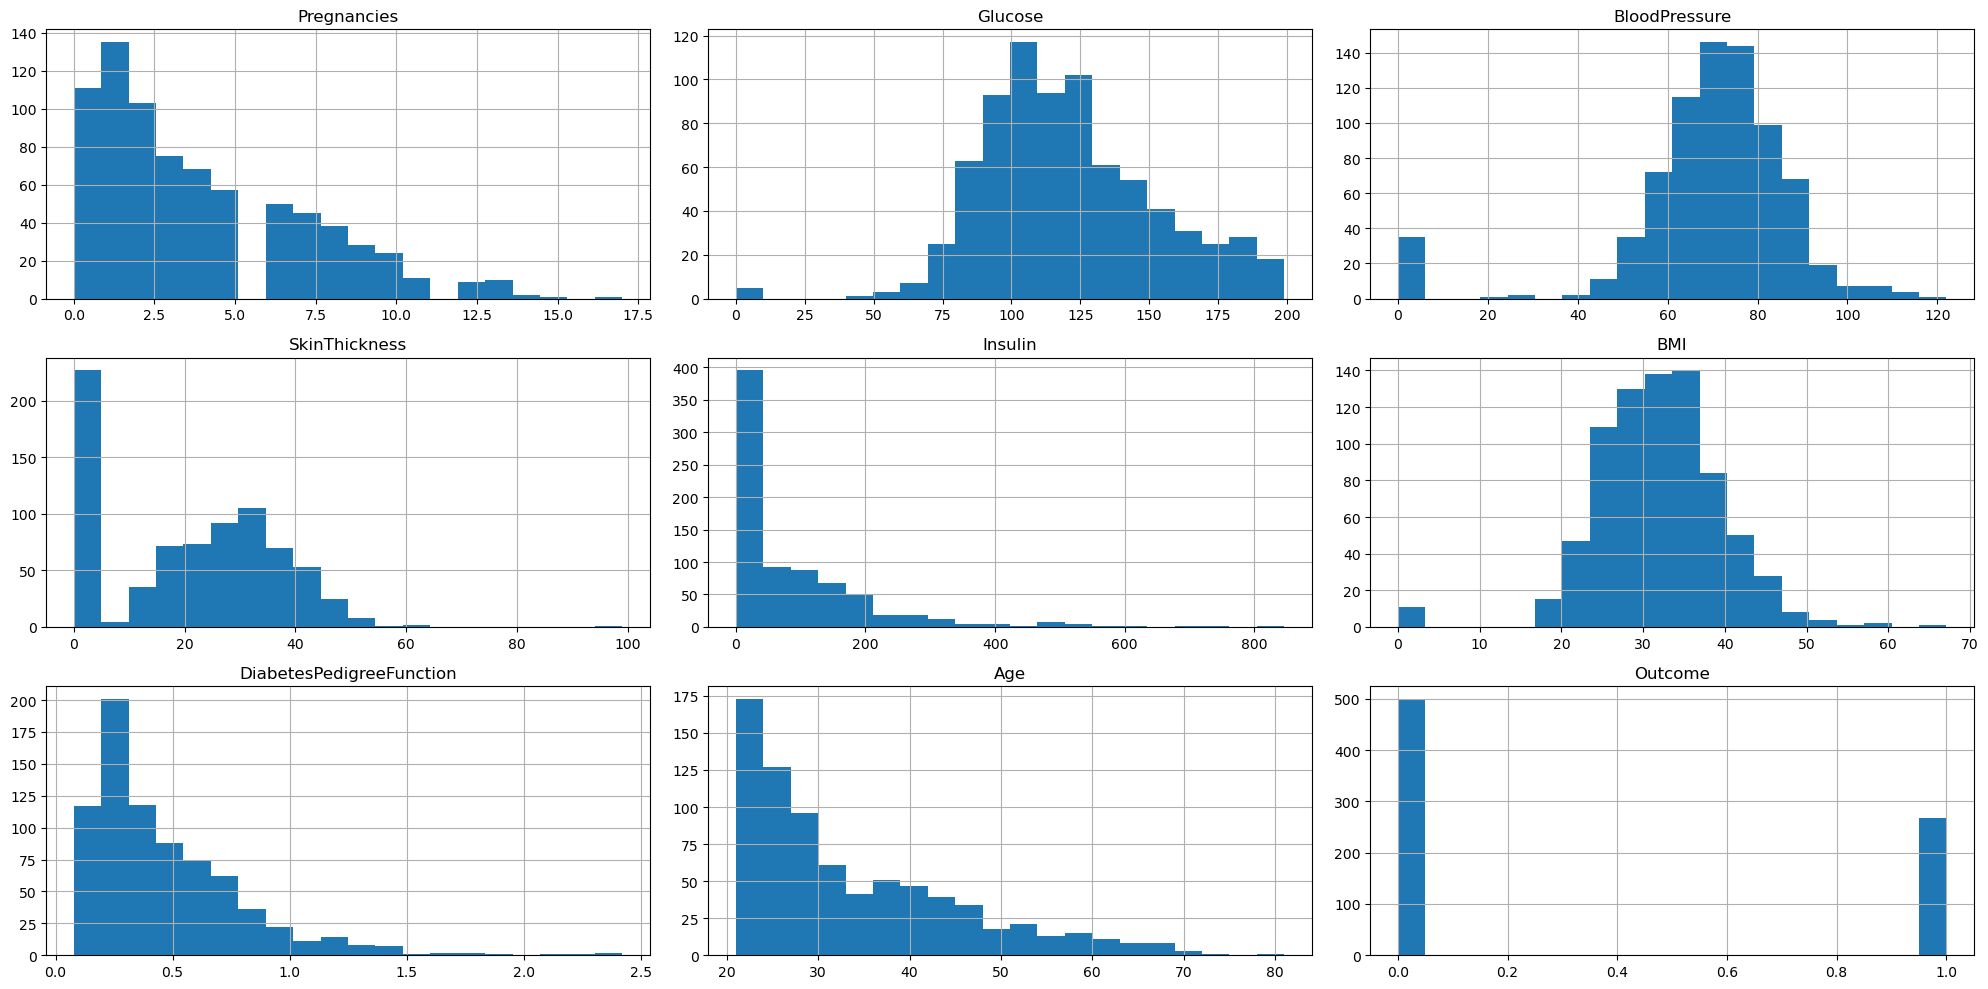

In [51]:
# Visualizing distributions of each feature
df.hist(bins=20, figsize=(20, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

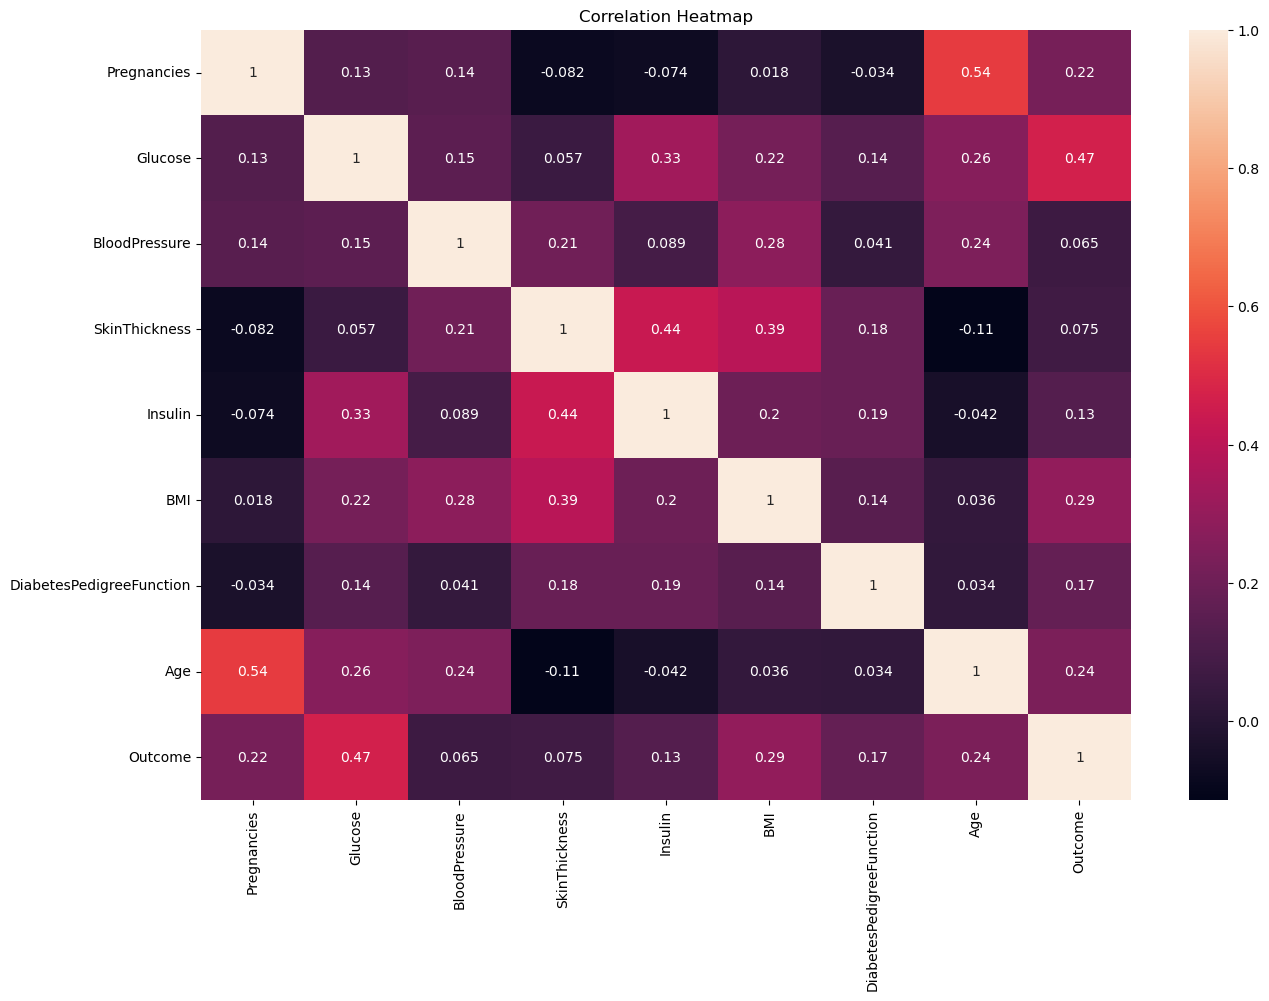

In [57]:
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

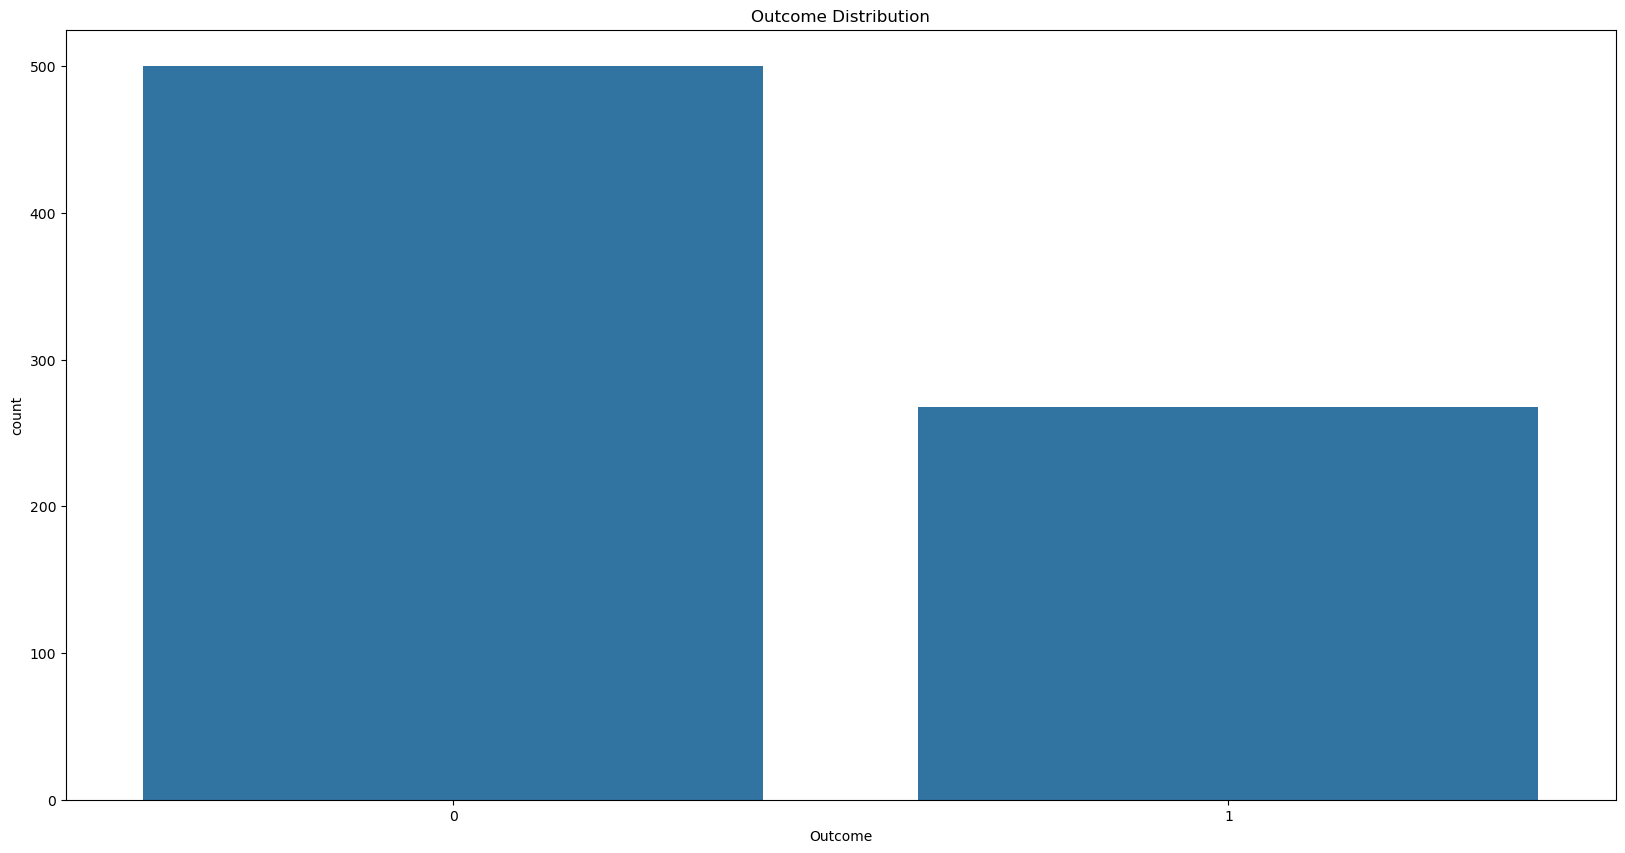

In [ ]:
# Outcome distribution
plt.figure(figsize=(20, 10))
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Distribution')
plt.show()

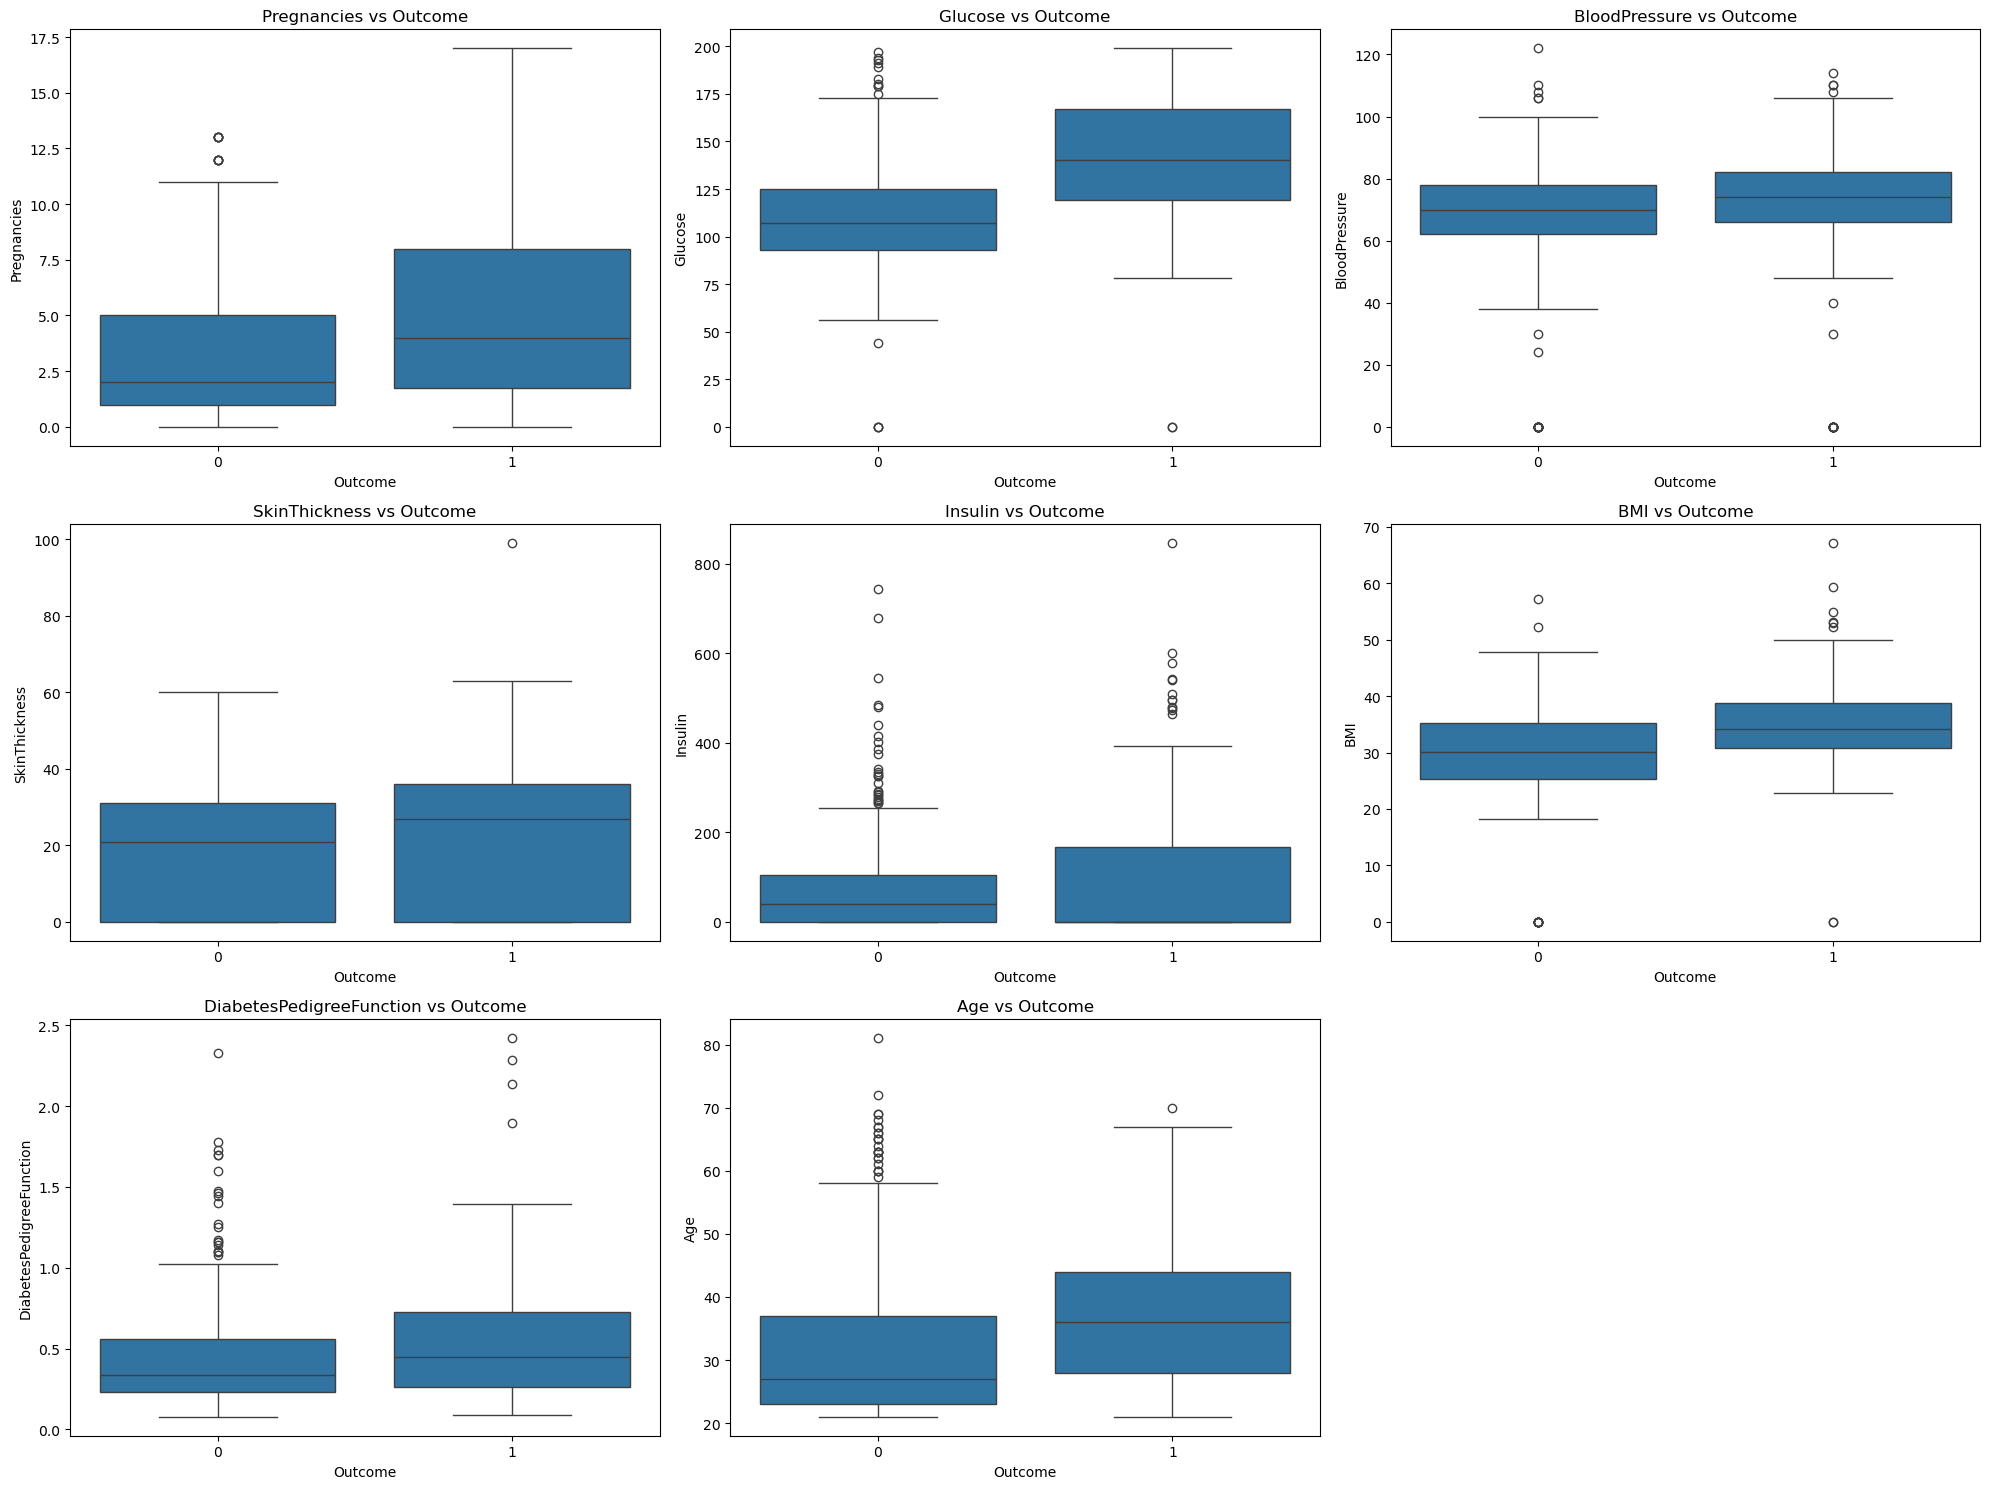

In [40]:
# Boxplots for features vs Outcome
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=column, data=df)
    plt.title(f'{column} vs Outcome')
plt.tight_layout()
plt.show()

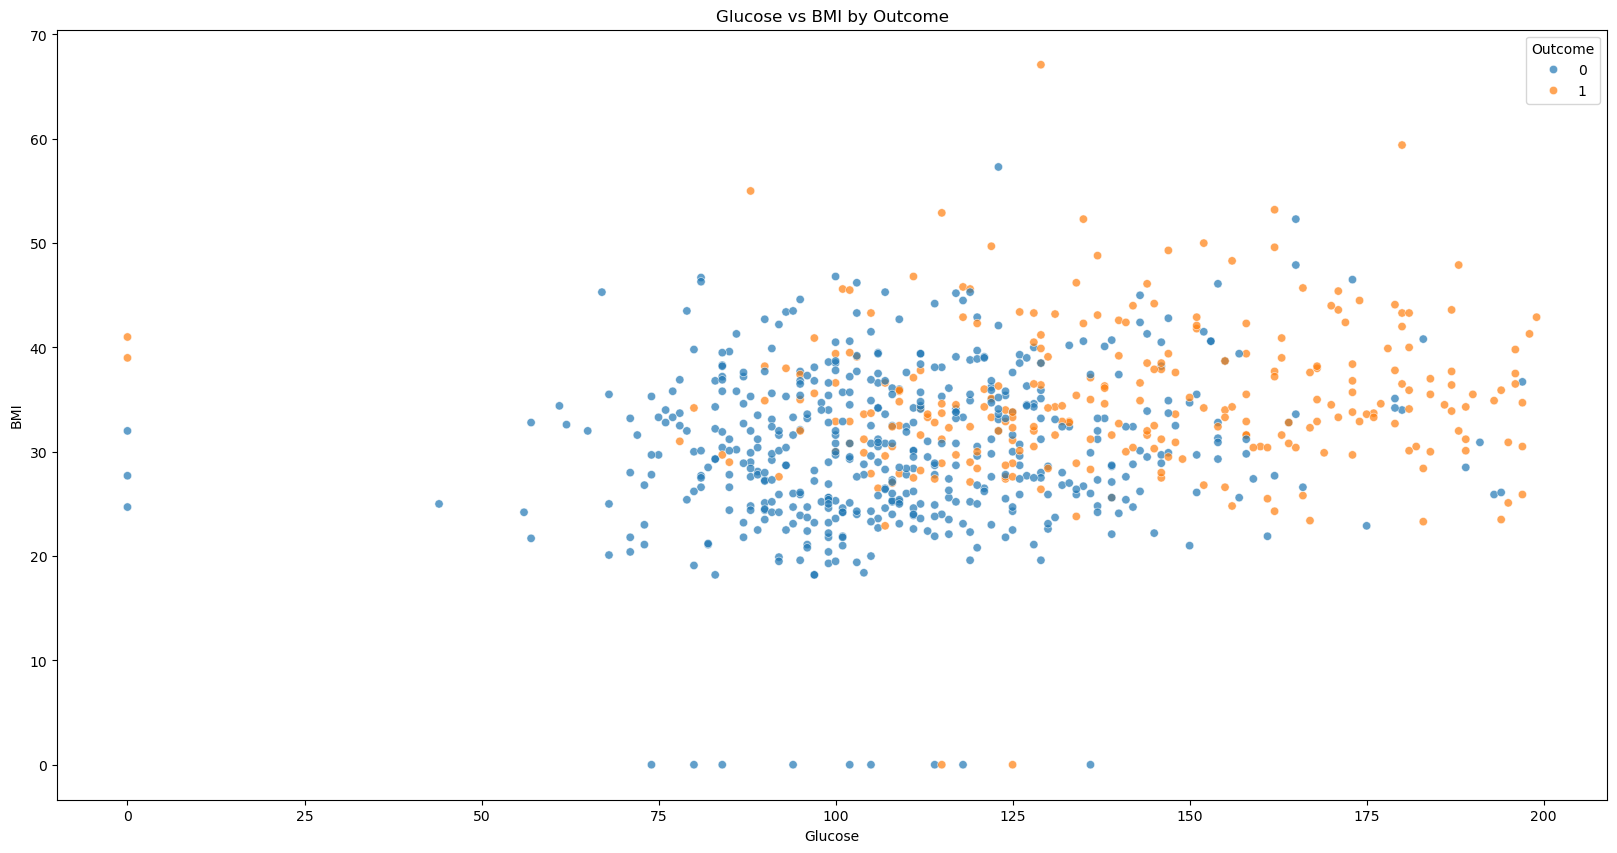

In [42]:
# Scatter plot for Glucose vs BMI grouped by Outcome
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, alpha=0.7)
plt.title('Glucose vs BMI by Outcome')
plt.show()

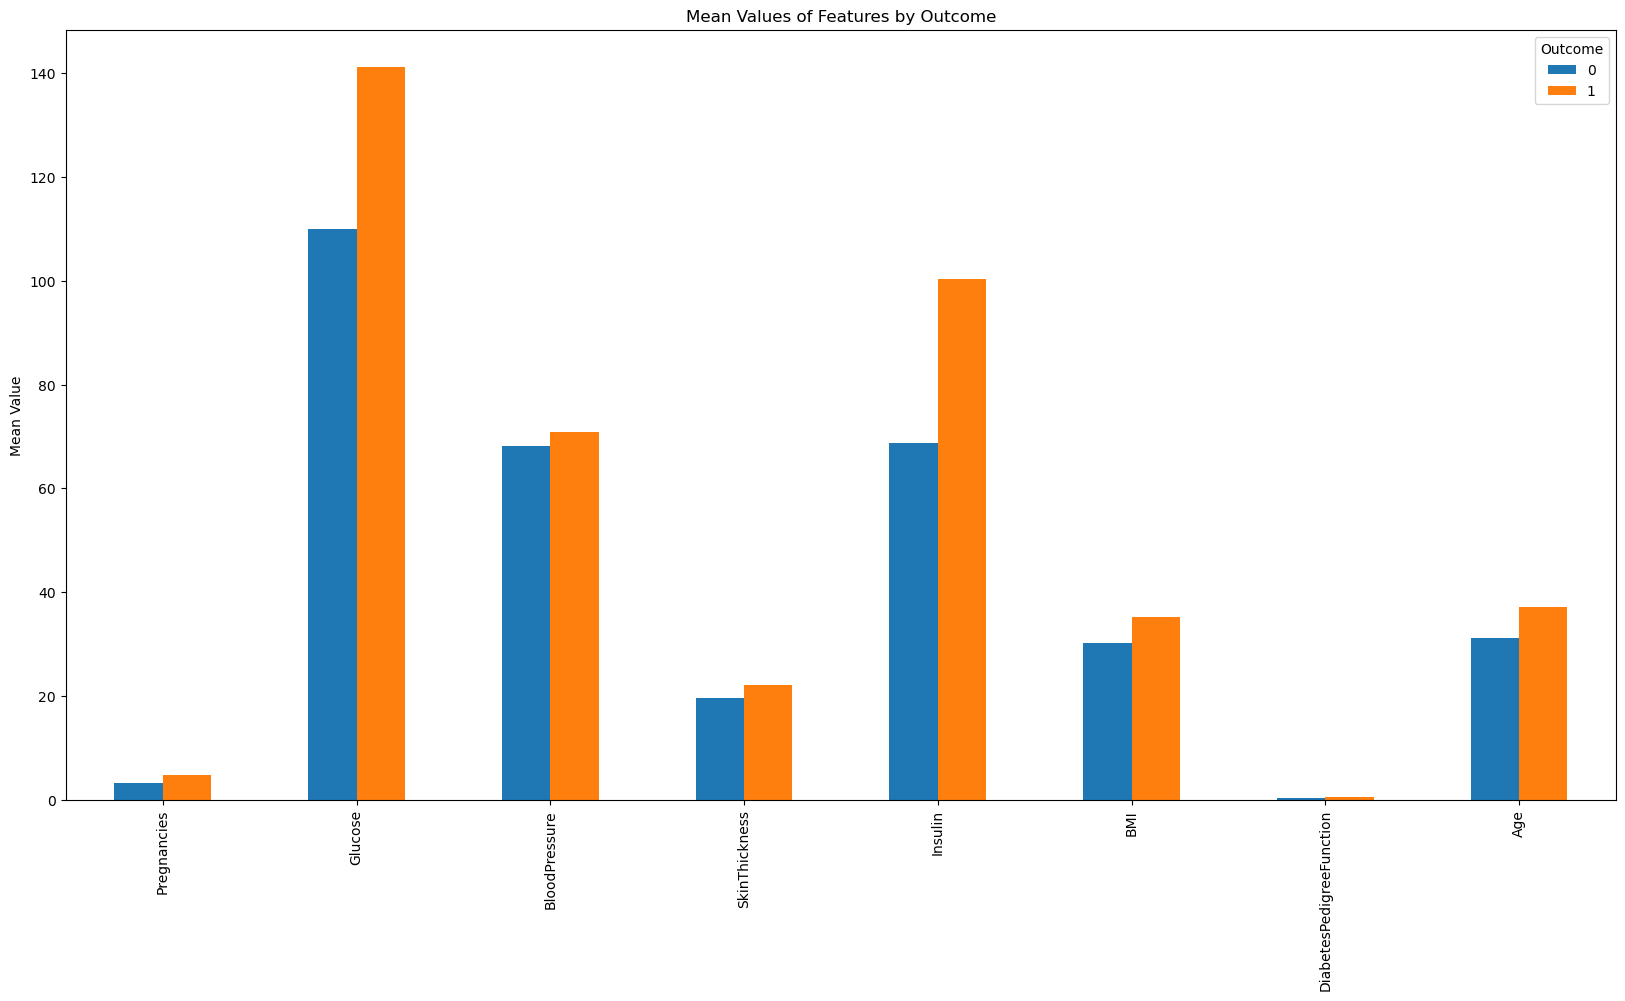

In [43]:
# Bar plot for mean values of features grouped by Outcome
mean_values = df.groupby('Outcome').mean().T
mean_values.plot(kind='bar', figsize=(20, 10))
plt.title('Mean Values of Features by Outcome')
plt.ylabel('Mean Value')
plt.show()

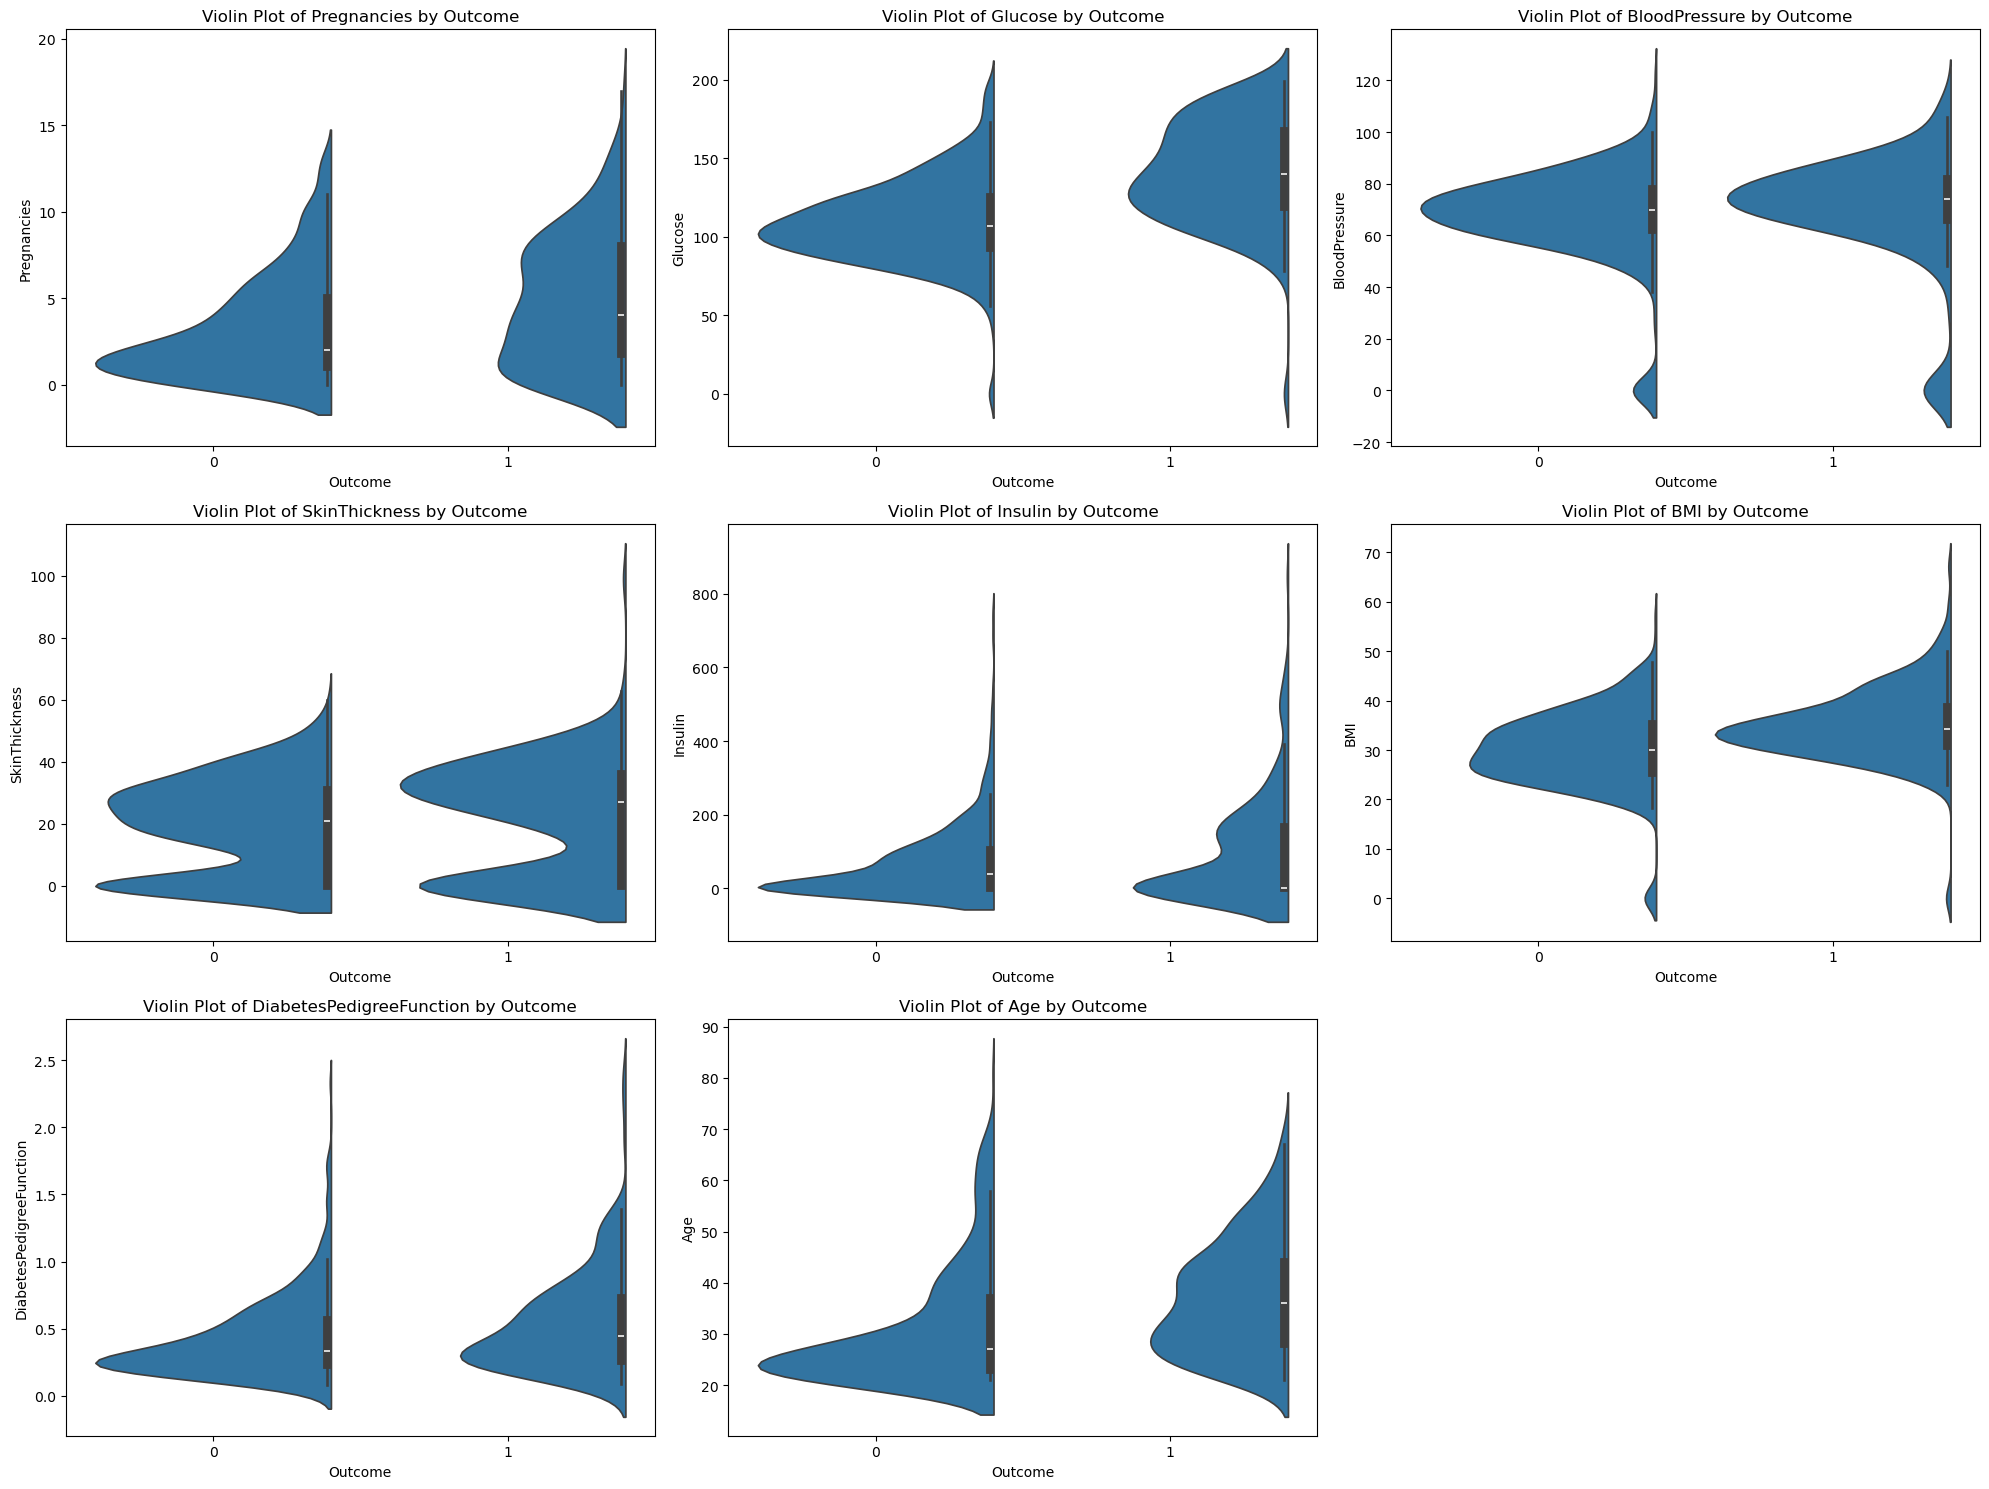

In [48]:
# Violin plots for features grouped by Outcome as subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(df.columns[:-1]):  # Excluding Outcome
    sns.violinplot(x='Outcome', y=column, data=df, split=True, ax=axes[i])
    axes[i].set_title(f'Violin Plot of {column} by Outcome')

# Hiding unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

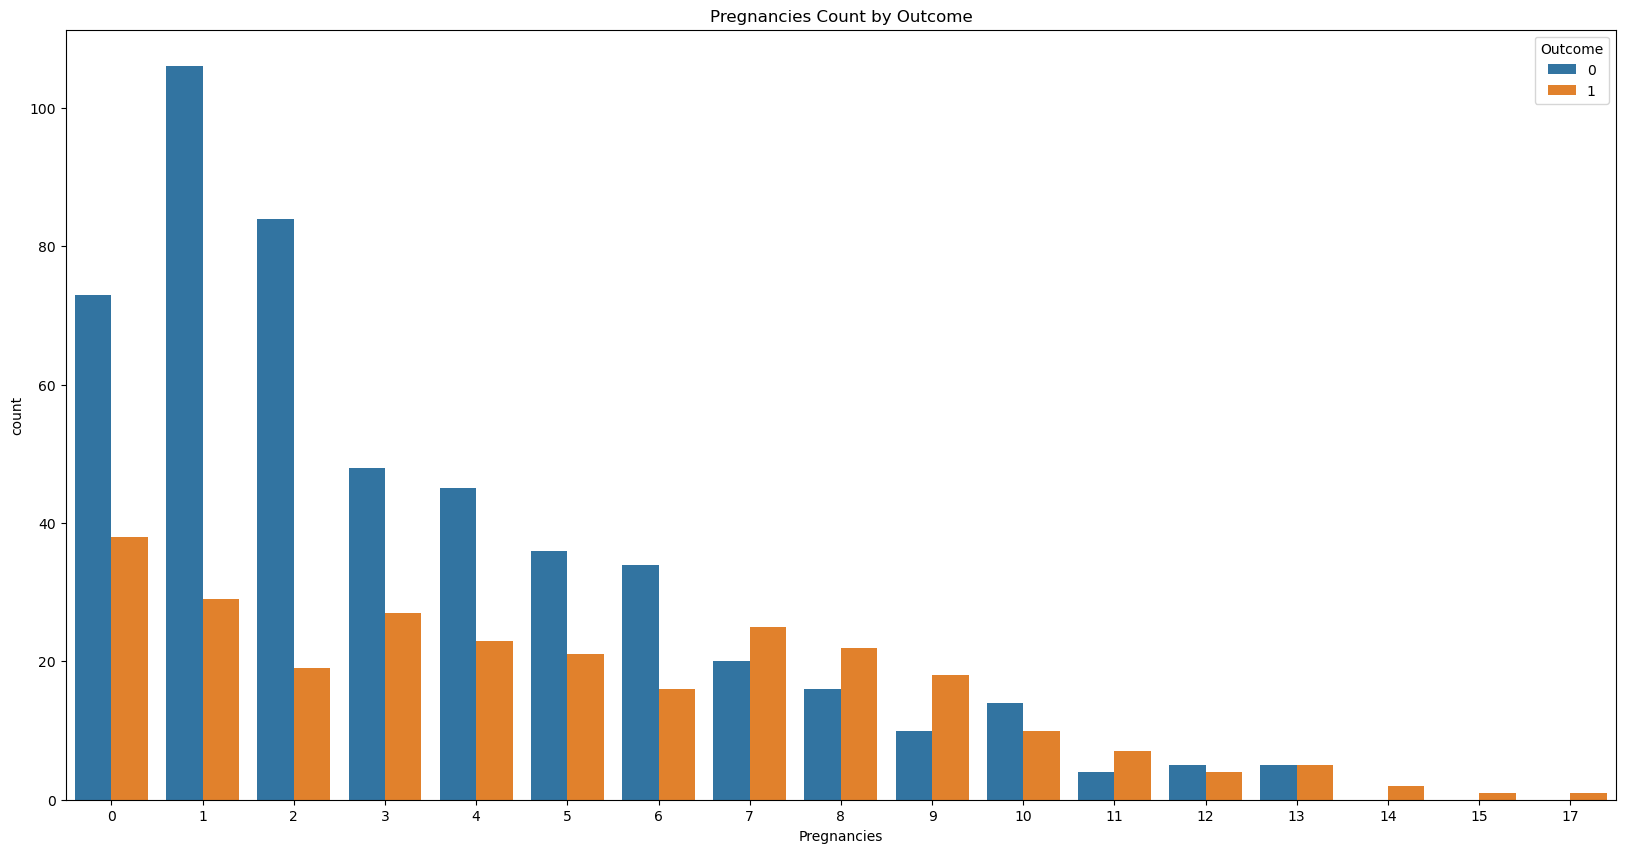

In [49]:
# Countplot for Pregnancies grouped by Outcome
plt.figure(figsize=(20, 10))
sns.countplot(x='Pregnancies', hue='Outcome', data=df)
plt.title('Pregnancies Count by Outcome')
plt.show()

# Preprocessing

In [ ]:
# Splitting dataset into features and target
y = df['Outcome']
X =  df.drop('Outcome', axis='columns')

In [99]:
# Scaling of X for better performance
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [100]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

# Logistic Regression

In [101]:
# Initializing LogReg Model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [102]:
# Predictions
y_pred_logreg = LogReg.predict(X_test)
y_pred_logreg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

# Decision Tree Classifier

In [103]:
# Initializing Decision Tree Model
DT_classififer = DecisionTreeClassifier(max_depth=10)
DT_classififer.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [104]:
# Predictions
y_pred_dt = DT_classififer.predict(X_test)
y_pred_dt

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

# Random Forest

In [105]:
# Initializing Random Forest Model
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)

RandomForestClassifier()

In [106]:
# Predictions
y_pred_rf = randomForest.predict(X_test)
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

# Naive Bayes

In [107]:
# Initializing Naive Bayes Model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [108]:
# Predictions
y_pred_nb = nb_classifier.predict(X_test)
y_pred_nb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

# Analyzing the models

### Logistic Regression

In [109]:
# Accuracy Score
print('Accuracy:', (LogReg.score(X_test, y_test)))

Accuracy: 0.7835497835497836


In [110]:
# Confusion Matrix
print(metrics.confusion_matrix(y_test, y_pred_logreg))

[[132  14]
 [ 36  49]]


In [111]:
# Classification Report
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred_logreg))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [112]:
# ROC score
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred_logreg)
fpr, tpr, thresholds = metrics.roc_curve(y_test, LogReg.predict_proba(X_test)[:,-1])

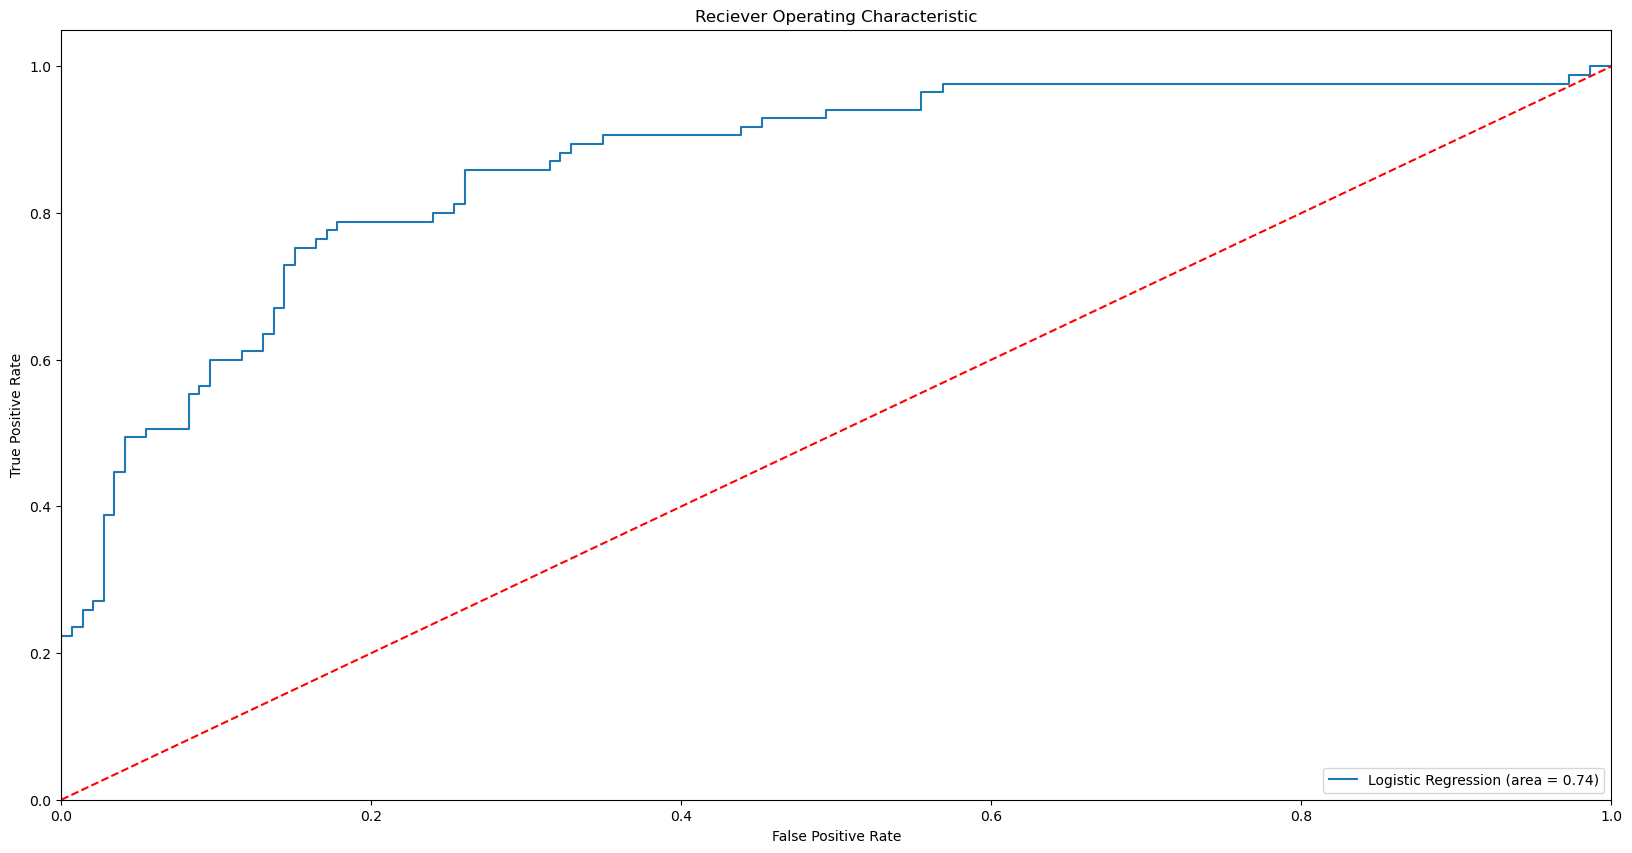

In [113]:
plt.figure(figsize=(20,10))

plt.title('Reciever Operating Characteristic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.xlim([0.0, 1.0])  # Set limits for the x-axis
plt.ylim([0.0, 1.05])  # Set limits for the y-axis

    # Plot the ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)  
    # Plot a diagonal line for reference
plt.plot([0, 1], [0, 1], 'r--')  

plt.legend(loc='lower right')
plt.show()

### Decision Tree

In [114]:
# Accuracy Score
print('Accuracy:', metrics.accuracy_score(y_pred_dt, y_test))

Accuracy: 0.6926406926406926


In [115]:
# Confusion Matrix
print(metrics.confusion_matrix(y_pred_dt, y_test))

[[117  42]
 [ 29  43]]


In [116]:
# Classification Report
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred_dt))


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       146
           1       0.60      0.51      0.55        85

    accuracy                           0.69       231
   macro avg       0.67      0.65      0.66       231
weighted avg       0.68      0.69      0.69       231



### Random Forest

In [117]:
# Accuracy Score
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.7922077922077922


In [118]:
# Confusion Matrix
print(metrics.confusion_matrix(y_test, y_pred_rf))

[[130  16]
 [ 32  53]]


In [119]:
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       146
           1       0.77      0.62      0.69        85

    accuracy                           0.79       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.79      0.79      0.79       231



### Naive Bayes

In [120]:
# Accuracy Score
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_nb))

Accuracy: 0.7835497835497836


In [121]:
# Confusion Matrix
print(metrics.confusion_matrix(y_test, y_pred_nb))

[[128  18]
 [ 32  53]]


In [122]:
# Classification Report
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred_nb))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.75      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231

